# Gráficos - Parte 4 (Seaborn - Restaurante)

(*) Caderno produzido por Edson Pimentel a partir [deste tutorial](https://minerandodados.com.br/tutorial-completo-de-como-trabalhar-com-a-biblioteca-seaborn/). 


O objetivo deste caderno (notebook) é mostrar exemplos da criação de gráficos utilizando a biblioteca `seaborn`. Esta biblioteca disponibiliza mais opções o que possibilita a construção de gráficos mais complexos e  mais elaborados.

## A Base de Dados

Vamos utilizar a tabela "restaurante.csv", que é um dataset de exemplo que a própria biblioteca seaborn fornece para as análise iniciais. Ele contém 244 registros de clientes de um restaurante, conforme é descrito a seguir. Os dados e colunas foram traduzidos para português.

* TotalConta: Custo total da refeição em dólares.
* Gorjeta: Valor da gorjeta em dólares.
* Sexo: Feminino / Masculino.
* Fumante: Se a área escolhida era para fumantes ou não.
* DiaSem: Dia da semana (Segunda, ..., Domingo).
* Horario: Almoço ou Jantar
* Tamanho: Tamanho da refeição (1 a 6).


In [ ]:
import pandas as pd 
#https://drive.google.com/file/d/1o8hOIzSbFeBMue5iM_x8dl26mLfrkHbh/view?usp=sharing
codigo = "1o8hOIzSbFeBMue5iM_x8dl26mLfrkHbh"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
Resta = pd.read_csv(file, sep = ";")
print(Resta)

     TotalConta  Gorjeta       Sexo Fumante   DiaSem Horario  Tamanho
0         16.99     1.01   Feminino     Não  Domingo  Jantar        2
1         10.34     1.66  Masculino     Não  Domingo  Jantar        3
2         21.01     3.50  Masculino     Não  Domingo  Jantar        3
3         23.68     3.31  Masculino     Não  Domingo  Jantar        2
4         24.59     3.61   Feminino     Não  Domingo  Jantar        4
..          ...      ...        ...     ...      ...     ...      ...
239       29.03     5.92  Masculino     Não   Sábado  Jantar        3
240       27.18     2.00   Feminino     Sim   Sábado  Jantar        2
241       22.67     2.00  Masculino     Sim   Sábado  Jantar        2
242       17.82     1.75  Masculino     Não   Sábado  Jantar        2
243       18.78     3.00   Feminino     Não   Quinta  Jantar        2

[244 rows x 7 columns]


In [ ]:
Resta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TotalConta  244 non-null    float64
 1   Gorjeta     244 non-null    float64
 2   Sexo        244 non-null    object 
 3   Fumante     244 non-null    object 
 4   DiaSem      244 non-null    object 
 5   Horario     244 non-null    object 
 6   Tamanho     244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


A seguir a classificação de todas as variáveis desse conjunto de dados. 

* TotalConta: contínua
* Gorjeta: contínua
* Sexo: nominal
* Fumante: nominal
* DiaSem: nominal
* Horario: nominal
* Tamanho: ordinal

## Biblioteca Gráfica Seaborn


In [1]:
import matplotlib.pyplot as plt 
# Importando seaborn para gráficos mais complexos e elaborados
import seaborn as sns

## Relação de Variáveis - Função relplot()

relplot() é uma função para visualização de relações estatísticas entre variáveis e combina o "scatter" e "line" (dispersão e linha)

### 1) Relação entre Total da Conta e Gorjeta.


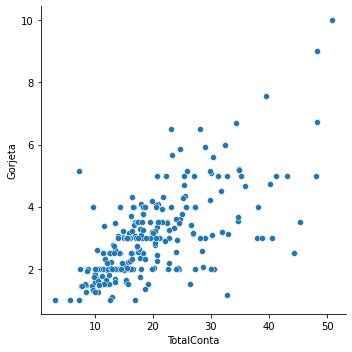

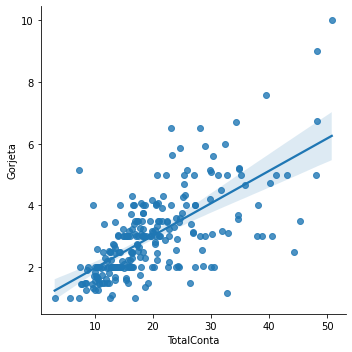

In [6]:
import pandas as pd 
#https://drive.google.com/file/d/1o8hOIzSbFeBMue5iM_x8dl26mLfrkHbh/view?usp=sharing
codigo = "1o8hOIzSbFeBMue5iM_x8dl26mLfrkHbh"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
Resta = pd.read_csv(file, sep = ";")
sns.relplot(x="TotalConta", y="Gorjeta", data=Resta);

#dados acrescentados por mim
graf = sns.lmplot(x="TotalConta", y="Gorjeta", data=Resta)

O gráfico de dispersão parece indicar que quanto maior o valor da refeição maior é o valor da gorjeta. Podemos tentar confirmar isto calculando o coeficiente de correlação.

In [ ]:
Resta['TotalConta'].corr(Resta['Gorjeta'])

0.6757341092113641

0.67 está entre [0.40 a 0.69] e é considerada uma "**Correlação moderada**".

### *2*) Relação entre Total da conta e Gorjeta (separação pela variável "Sexo")

No Seaborn, o parâmetro `hue` determina qual coluna da tabela deve ser usada para "colorir" os pontos (separar os dados).

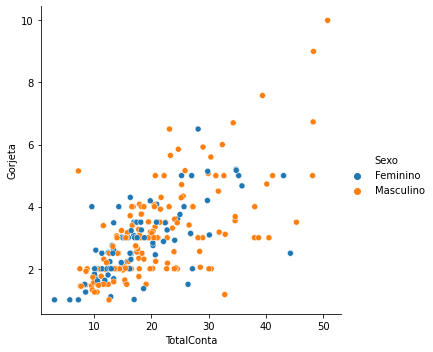

In [7]:
sns.relplot(x="TotalConta", y="Gorjeta", hue = "Sexo", data=Resta)


A figura mostra que há picos de valores de Conta e Gorjeta mais altos para o Sexo Masculina, mas nada conclusivo.

### 3)Relação entre Total da Conta e Gorjeta (separação por Tamanho do prato)
Em casos de variáveis numéricas (tamanho do prato) a tonalidade é alterada de forma sequencial.

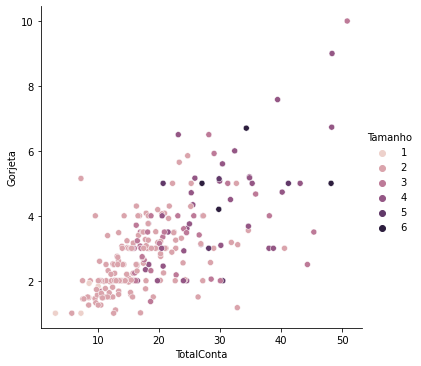

In [ ]:
sns.relplot(x="TotalConta", y="Gorjeta", hue = "Tamanho", data=Resta)

Podemos usar o tamanho do "ponto" ao invés de cores para visualização dos subconjuntos, por meio do parâmetro "`size"`.

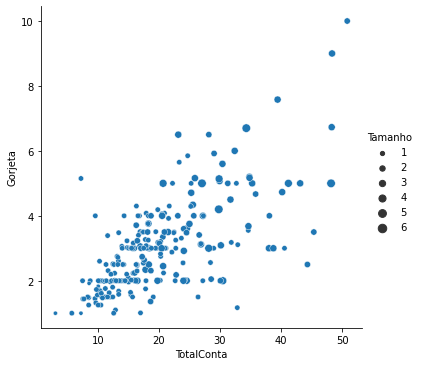

In [ ]:

sns.relplot(x="TotalConta", y="Gorjeta", size = "Tamanho", data=Resta)


Caso o tamanho dos "pontos" não esteja adequado pode ser usar o parâmeto "sizes" para ampliar o tamanho de cada ponto conforme abaixo.

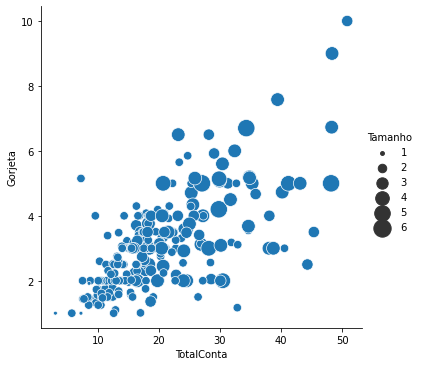

In [ ]:
sns.relplot(x="TotalConta", y="Gorjeta", size = "Tamanho", sizes=(15,300), data=Resta)

## Relação de Variáveis - Função scatterplot()

A função scatterplot traça apenas pontos, ou seja, não possui a funcionalidade de também traçar linhas como a relplot()

### 4) Relação entre Total da conta e Gorjeta (separação pela variável "Dia da Semana")

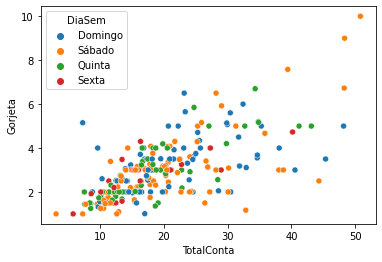

In [ ]:
sns.scatterplot(x="TotalConta", y="Gorjeta", hue = "DiaSem", data=Resta)

## Dados Categóricos

### 5) Quantidade de clientes por Sexo (barras vertical)

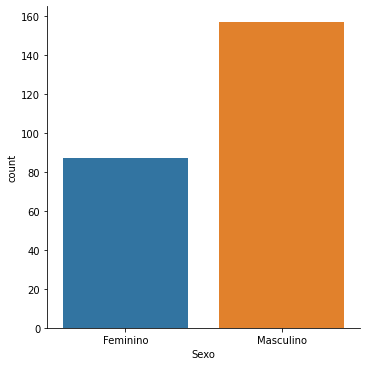

In [ ]:
sns.catplot(x="Sexo", kind="count", data=Resta)

### 6) Quantidade de clientes por Dia da Semana (barras horizontal)

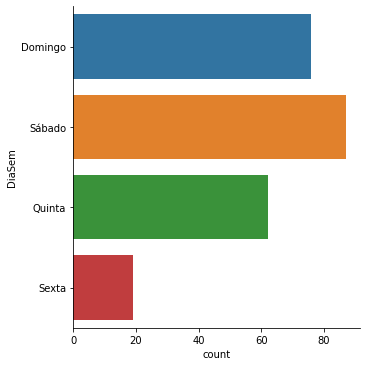

In [ ]:
sns.catplot(y="DiaSem", kind="count", data=Resta)

### 7) Relação entre Dia da Semana e Total da conta (tiras)

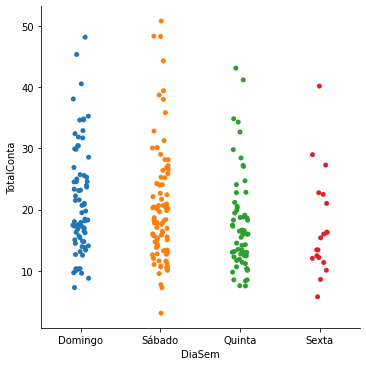

In [ ]:
sns.catplot(x="DiaSem", y="TotalConta", data=Resta)

O parâmetro `kind = "swarm"` evita sobreposição de pontos.

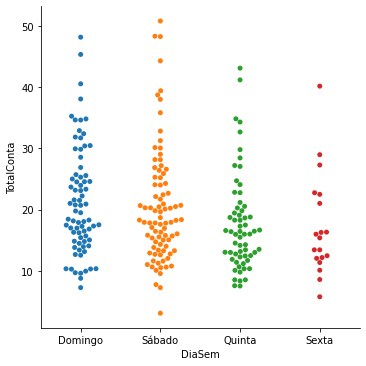

In [ ]:
sns.catplot(x="DiaSem", y="TotalConta", kind = "swarm", data=Resta)

O parâmetro `hue` permite adicionarmos uma terceira variável a nossa visualização.

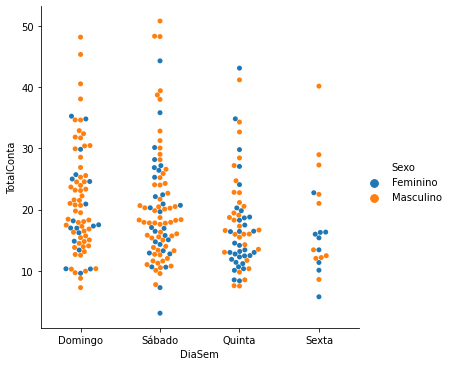

In [ ]:
sns.catplot(x="DiaSem", y="TotalConta", hue = "Sexo", kind = "swarm", data=Resta)

O parâmetro `order` permite alterarmos a ordem padrão das categorias que estão sendo exibidas.

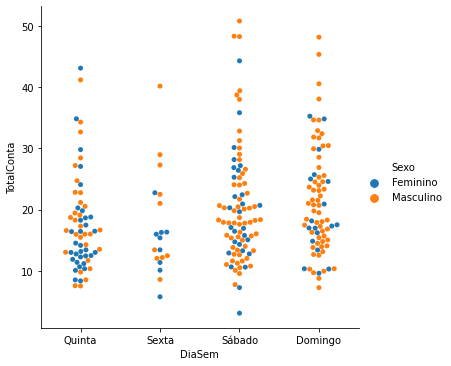

In [ ]:
sns.catplot(x="DiaSem", y="TotalConta", hue = "Sexo", kind = "swarm", 
             order=['Quinta','Sexta','Sábado','Domingo'], data=Resta)

Podemos inverter a visualização para `plots horizontais`. Basta trocar o "x" e o "y".

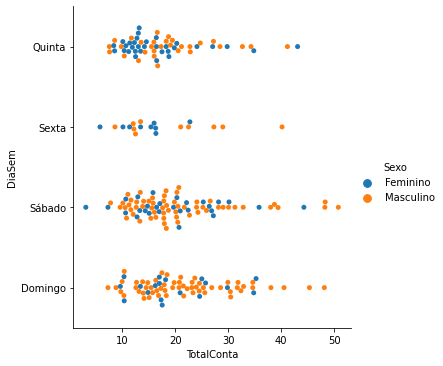

In [ ]:
sns.catplot(y="DiaSem", x="TotalConta", hue = "Sexo", kind = "swarm", 
             order=['Quinta','Sexta','Sábado','Domingo'], data=Resta)

## Visualizando Outliers (Boxplot)

### 8) Boxplot - "Total da Conta" por "Dia da Semana"

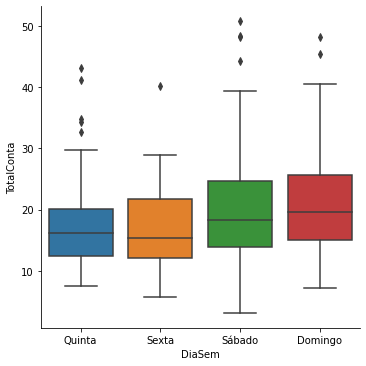

In [ ]:
sns.catplot(x="DiaSem", y="TotalConta", kind = "box", 
             order=['Quinta','Sexta','Sábado','Domingo'], data=Resta)

### 9) Boxplot - "Total da Conta" por "Dia da Semana" (separado por Sexo)

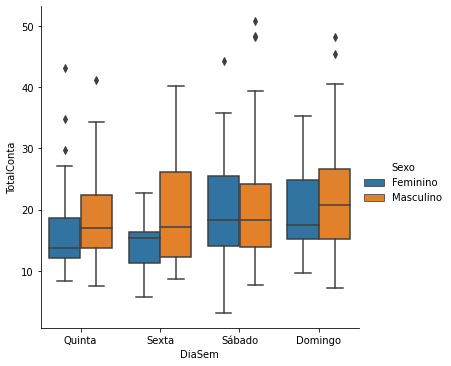

In [ ]:
sns.catplot(x="DiaSem", y="TotalConta", kind = "box", hue = "Sexo", 
             order=['Quinta','Sexta','Sábado','Domingo'], data=Resta)


### 10) Boxplot - "Total da Conta" por "Dia da Semana" (foco na forma dos dados)

Tipo de Boxplot com foco maior na forma dos dados do que nos outliers.

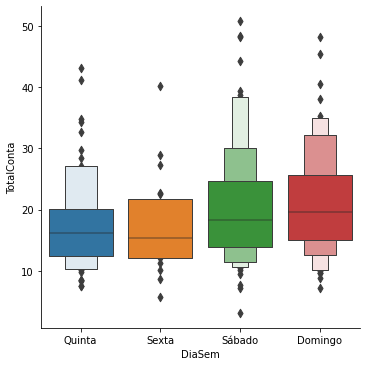

In [ ]:
sns.catplot(x="DiaSem", y="TotalConta", kind = "boxen", 
             order=['Quinta','Sexta','Sábado','Domingo'], data=Resta)

### 11) Striplot - "Total da Conta" por "Dia da Semana" (foco na forma dos dados)

O Método stripplot permite plotar a distribuição dos dados. É possível ainda combinar os dois gráficos.

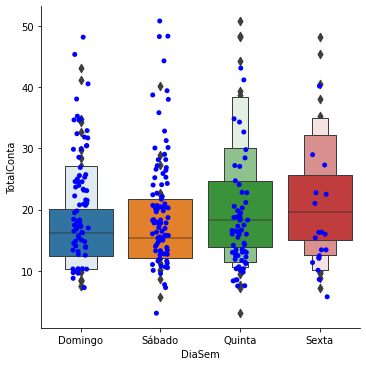

In [ ]:
sns.catplot(x="DiaSem", y="TotalConta", kind = "boxen", 
             order=['Quinta','Sexta','Sábado','Domingo'], data=Resta)
sns.stripplot(x="DiaSem", y="TotalConta", color="blue", data=Resta)

## Gráficos de Correlação

Útil para visualizar se existem correlações positivas ou negativas entre colunas

In [ ]:
correlacoes = Resta.corr()
correlacoes

,TotalConta,Gorjeta,Tamanho
TotalConta,1.000000,0.675734,0.598315
Gorjeta,0.675734,1.000000,0.489299
Tamanho,0.598315,0.489299,1.000000


### 12) Mapa de Calor (correlações)

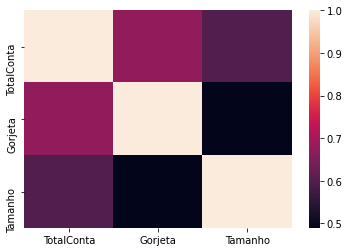

In [ ]:
ax = sns.heatmap(correlacoes)

### 13) Mapa de Calor (correlações) - Exibindo valores

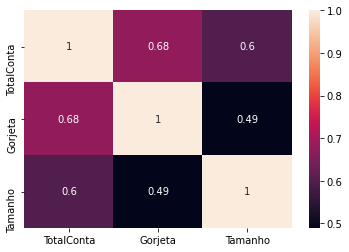

In [ ]:
ax = sns.heatmap(correlacoes, annot=True)

### 14) Mapa de Calor - Não Fumantes (correlações) - Exibindo valores

In [ ]:
# Obtem dados separados de Fumantes e Não Fumantes
FSim = Resta.query("Fumante == 'Sim'")
FNao = Resta.query("Fumante == 'Não'")

In [ ]:
corrFNao = FNao.corr()
corrFNao

,TotalConta,Gorjeta,Tamanho
TotalConta,1.000000,0.822183,0.688068
Gorjeta,0.822183,1.000000,0.580107
Tamanho,0.688068,0.580107,1.000000


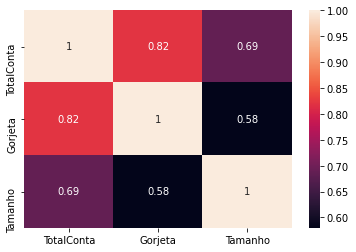

In [ ]:
ax = sns.heatmap(corrFNao, annot=True)

### 15) Mapa de Calor - Fumantes (correlações) - Exibindo valores

In [ ]:
corrFSim = FSim.corr()
corrFSim

,TotalConta,Gorjeta,Tamanho
TotalConta,1.000000,0.488218,0.527890
Gorjeta,0.488218,1.000000,0.332227
Tamanho,0.527890,0.332227,1.000000


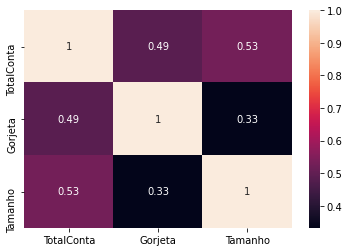

In [ ]:
ax = sns.heatmap(corrFSim, annot=True)

## Gráficos com Regressão

Quando temos muitas variáveis quantitativas em nossos dados é interessante visualizar como estas se relacionam. Podemos também mostrar uma "reta" de regressão.

### *16*) Relação entre Total da conta e Gorjeta com separação pela variável "Fumante".

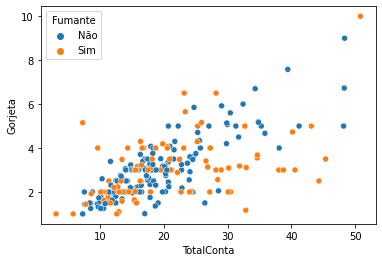

In [ ]:
sns.scatterplot(x="TotalConta", y="Gorjeta", hue="Fumante", data=Resta);

In [ ]:
Correl = Resta['TotalConta'].corr(Resta['Gorjeta'])
Correl

0.6757341092113641

Já vimos acima que o coeficiente de correlação entre valor Total da Conta e Gorgeta é = 0.67, ou seja, está entre [0.40 a 0.69] e é considerada uma "**Correlação moderada**".

Vamos comparar o coeficiente de correlação (Conta x Gorjeta) de fumantes ou não fumantes para confrontar com o gráfico.

In [ ]:
CFSim = FSim['TotalConta'].corr(FSim['Gorjeta'])
CFSim

0.4882179411628103

In [ ]:
CFNao = FNao['TotalConta'].corr(FNao['Gorjeta'])
CFNao

0.8221826257050837

In [ ]:
print("Coef.Correl. Clientes", Correl)
print("Coef.Correl. Fumante: ", CFSim)
print("Coef.Correl. Não Fumante: ", CFNao)

Coef.Correl. Clientes 0.6757341092113641
Coef.Correl. Fumante:  0.4882179411628103
Coef.Correl. Não Fumante:  0.8221826257050837


Com a separação foi possível verificar que, com base nestes dados, para clientes "Não Fumantes" a correlação entre Gorjeta e Conta é 0.82, ou seja, **Forte** [0.70 a 0.89] e para "Fumantes" é 0.48, ou seja, **Moderada** [0.40 a 0.69].

### *17*) Relação entre Total da conta e Gorjeta - Não Fumantes

Veja o gráfico de dispersão (com a equação da reta) para **Não-Fumantes**.

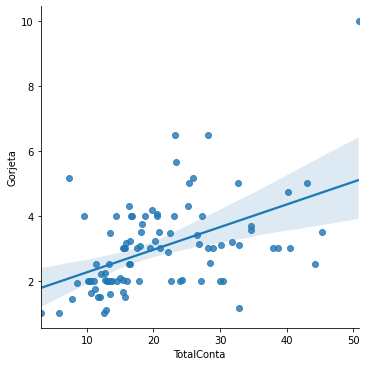

In [ ]:
sns.lmplot(x="TotalConta", y="Gorjeta", data=FSim)

### *18*) Relação entre Total da conta e Gorjeta - Fumantes

Veja o gráfico de dispersão (com a equação da reta) para **Fumantes**.

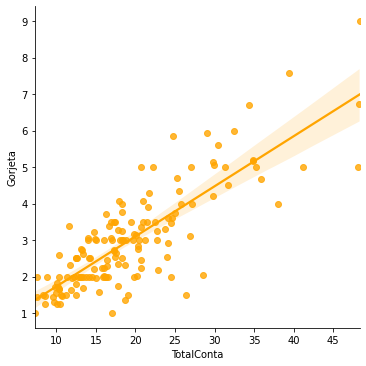

In [ ]:
sns.lmplot(x="TotalConta", y="Gorjeta",scatter_kws={'color': 'orange'}, line_kws={'color': 'orange'} ,data=FNao)



### *19*) Relação entre Total da conta e Gorjeta - Fumantes e Não Fumantes

Veja, na mesma imagem, o gráfico de dispersão (com a equação da reta) para **Fumantes e Não-Fumantes**.

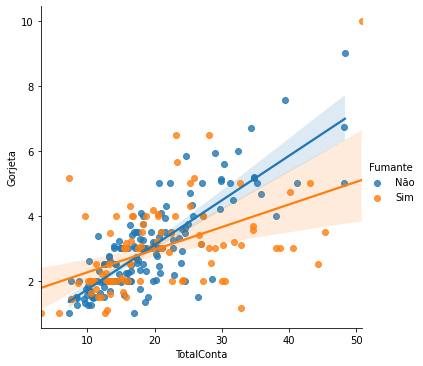

In [ ]:
sns.lmplot(x="TotalConta", y="Gorjeta", hue = "Fumante", data=Resta)


### 20) Relação entre Total da conta e Gorjeta - Fumantes e Não Fumantes (por horário)

Podemos ainda usando o parâmetro `col` para segregar os gráficos pelo valor da coluna categórica "**Horario**".

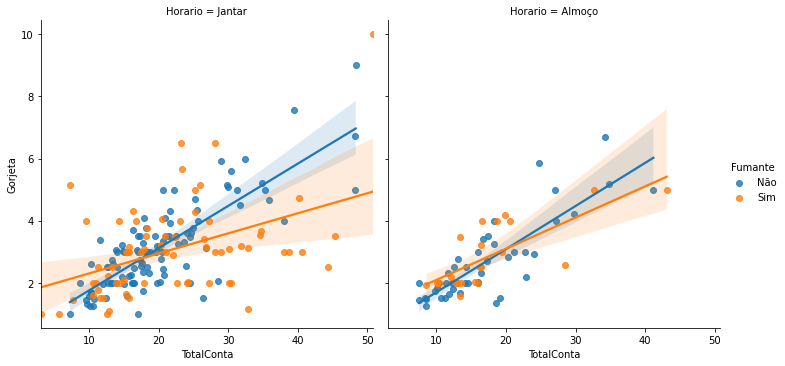

In [ ]:
sns.lmplot(x="TotalConta", y="Gorjeta", hue = "Fumante", col="Horario", data=Resta)

Os parâmetros `scatter_kws` e `line_kws` possibilitam alterar a cor dos pontos e da linha. O parâmetro `alfha` possibilita adicionar uma certa transparência nas cores

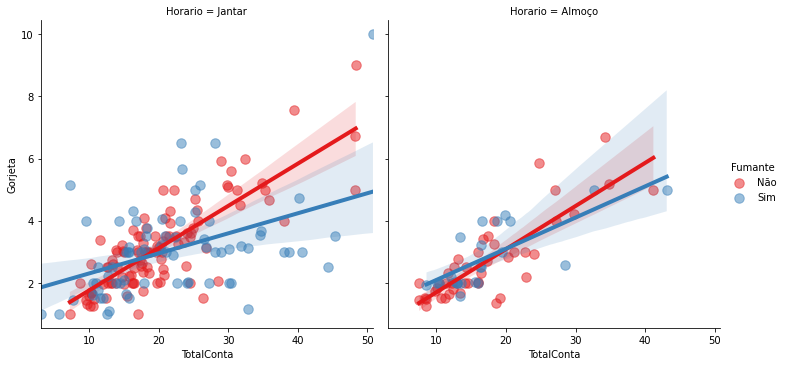

In [ ]:
sns.lmplot(x="TotalConta", y="Gorjeta", hue = "Fumante", 
           col="Horario", palette="Set1", scatter_kws={'s': 90, 'alpha': 0.5},
                 line_kws={'lw': 4}, data=Resta)

## Mais dados Categóricos (factorplot)


### 21) Relação entre Gorjeta e Tamanho do Prato (linhas e pontos)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


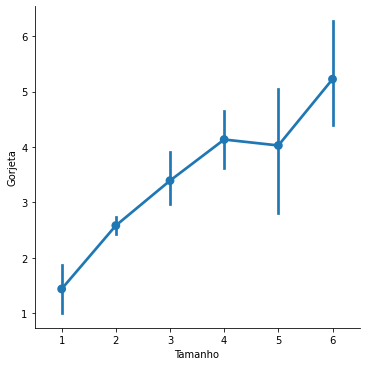

In [ ]:
sns.factorplot(x ='Tamanho', y ='Gorjeta', data = Resta) 

### 22) Relação entre Gorjeta e Tamanho do Prato - Categorizado por Sexo

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


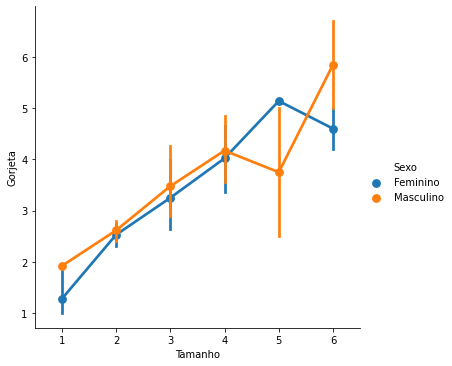

In [ ]:
sns.factorplot(x ='Tamanho', y ='Gorjeta', hue = "Sexo", data = Resta) 